# Tinanic Survival

* Dataset has been obtained from kaggle.com

## Data Analysis

In [1]:
import numpy as np
import pandas as pd

#load the files
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
data = pd.concat([train, test])

#size of training dataset
train_samples = train.shape[0]

#print some of them
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [2]:
#show the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


## Normalizing and selecting useful data

In [3]:
#Dropping useless features
data = data.drop(['Cabin', 'Embarked', 'Fare', 'Name', 'PassengerId', 'Ticket'], axis=1)
data.head(10)

,Age,Parch,Pclass,Sex,SibSp,Survived
0,22.0,0,3,male,1,0.0
1,38.0,0,1,female,1,1.0
2,26.0,0,3,female,0,1.0
3,35.0,0,1,female,1,1.0
4,35.0,0,3,male,0,0.0
5,NaN,0,3,male,0,0.0
6,54.0,0,1,male,0,0.0
7,2.0,1,3,male,3,0.0
8,27.0,2,3,female,0,1.0
9,14.0,0,2,female,1,1.0


In [4]:
#New column to know if the passenger has family on board
def family(size):
    if size == 0:
        return "alone"
    elif size < 5:
        return "medium"
    else:
        return "large"

data['FamilySize'] = (data['SibSp']+data['Parch']).apply(family)
data = data.drop(['SibSp', 'Parch'], axis=1)

data.head()

,Age,Pclass,Sex,Survived,FamilySize
0,22.0,3,male,0.0,medium
1,38.0,1,female,1.0,medium
2,26.0,3,female,1.0,alone
3,35.0,1,female,1.0,medium
4,35.0,3,male,0.0,alone


In [5]:
cond = (data['Sex']=='female') & (data['Pclass']==3)
data.groupby(['Survived','Sex','Pclass'])['Age'].mean()
data[cond].groupby(['Sex','Pclass'])['Age'].mean()

Sex     Pclass
female  3         22.185329
Name: Age, dtype: float64

In [6]:
def getAge(row):
    surv = row.Survived
    sex = row.Sex
    pclass = row.Pclass
    
    if surv==0 or surv==1:
        condition = (data['Survived']==surv) & (data['Sex']==sex) & (data['Pclass']==pclass)
        df_mean = data[condition].groupby(['Survived','Sex','Pclass'])['Age'].mean()
    else:
        condition = (data['Sex']==sex) & (data['Pclass']==pclass)
        df_mean = data[condition].groupby(['Sex','Pclass'])['Age'].mean()
    
    print("srv: {}, sex: {}, class: {} -> mean: {}".format(surv, sex, pclass, df_mean.mean()))
    return df_mean.mean()
    
data['Age'] = data['Age'].fillna(data.apply(getAge, axis=1))

srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 1.0, sex: female, class: 1 -> mean: 34.9390243902439
srv: 1.0, sex: female, class: 3 -> mean: 19.329787234042552
srv: 1.0, sex: female, class: 1 -> mean: 34.9390243902439
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 0.0, sex: male, class: 1 -> mean: 44.58196721311475
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 1.0, sex: female, class: 3 -> mean: 19.329787234042552
srv: 1.0, sex: female, class: 2 -> mean: 28.080882352941178
srv: 1.0, sex: female, class: 3 -> mean: 19.329787234042552
srv: 1.0, sex: female, class: 1 -> mean: 34.9390243902439
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 0.0, sex: female, class: 3 -> mean: 23.818181818181817
srv: 1.0, sex: female, class: 2 -> mean: 28.080882352941178
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 1.0, 

srv: 0.0, sex: male, class: 1 -> mean: 44.58196721311475
srv: 1.0, sex: female, class: 3 -> mean: 19.329787234042552
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 1.0, sex: female, class: 2 -> mean: 28.080882352941178
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 1.0, sex: male, class: 3 -> mean: 22.274210526315787
srv: 1.0, sex: female, class: 1 -> mean: 34.9390243902439
srv: 0.0, sex: female, class: 3 -> mean: 23.818181818181817
srv: 0.0, sex: male, class: 1 -> mean: 44.58196721311475
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 0.0, sex: male, class: 1 -> mean: 44.58196721311475
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 1.0, sex: femal

srv: 1.0, sex: female, class: 2 -> mean: 28.080882352941178
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 1.0, sex: male, class: 1 -> mean: 36.248000000000005
srv: 1.0, sex: female, class: 1 -> mean: 34.9390243902439
srv: 1.0, sex: female, class: 1 -> mean: 34.9390243902439
srv: 0.0, sex: male, class: 2 -> mean: 33.36904761904762
srv: 1.0, sex: female, class: 1 -> mean: 34.9390243902439
srv: 1.0, sex: female, class: 1 -> mean: 34.9390243902439
srv: 1.0, sex: female, class: 1 -> mean: 34.9390243902439
srv: 0.0, sex: female, class: 2 -> mean: 36.0
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 0.0, sex: male, class: 2 -> mean: 33.36904761904762
srv: 1.0, sex: female, class: 3 -> mean: 19.329787234042552
srv: 1.0, sex: female, class: 2 -> mean: 28.080882352941178
srv: 0.0, sex: male, class: 2 -> mean: 33.36904761904762
srv: 1.0, sex: female, class: 1 -> mean: 34.9390243902439
srv: 1.0, sex: female, class: 1 -> mean: 34.9390243902439
srv: 0.0, sex: male, clas

srv: 1.0, sex: male, class: 3 -> mean: 22.274210526315787
srv: 1.0, sex: male, class: 1 -> mean: 36.248000000000005
srv: 1.0, sex: female, class: 2 -> mean: 28.080882352941178
srv: 1.0, sex: male, class: 1 -> mean: 36.248000000000005
srv: 1.0, sex: female, class: 3 -> mean: 19.329787234042552
srv: 1.0, sex: male, class: 1 -> mean: 36.248000000000005
srv: 0.0, sex: male, class: 2 -> mean: 33.36904761904762
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 0.0, sex: male, class: 1 -> mean: 44.58196721311475
srv: 1.0, sex: male, class: 1 -> mean: 36.248000000000005
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 1.0, sex: male, class: 3 -> mean: 22.274210526315787
srv: 0.0, sex: male, class: 1 -> mean: 44.58196721311475
srv: 1.0, sex: female, class: 1 -> mean: 34.9390243902439
srv: 1.0, sex: female, class: 2 -> mean: 28.080882352941178
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 1.0, sex: male, class: 1 -> mean: 36.248000000000005
srv: 0.0, sex:

srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 1.0, sex: female, class: 1 -> mean: 34.9390243902439
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 0.0, sex: female, class: 3 -> mean: 23.818181818181817
srv: 0.0, sex: male, class: 2 -> mean: 33.36904761904762
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 1.0, sex: female, class: 2 -> mean: 28.080882352941178
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 1.0, sex: male, class: 1 -> mean: 36.248000000000005
srv: 1.0, sex: female, class: 2 -> mean: 28.080882352941178
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 0.0, sex: male, class: 1 -> mean: 44.58196721311475
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 1.0, sex: male, class: 1 -> mean: 36.248000000000005
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 0.0, sex: male

srv: 1.0, sex: female, class: 1 -> mean: 34.9390243902439
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 1.0, sex: male, class: 3 -> mean: 22.274210526315787
srv: 0.0, sex: male, class: 1 -> mean: 44.58196721311475
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 1.0, sex: female, class: 2 -> mean: 28.080882352941178
srv: 0.0, sex: male, class: 1 -> mean: 44.58196721311475
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 1.0, sex: female, class: 2 -> mean: 28.080882352941178
srv: 1.0, sex: male, class: 3 -> mean: 22.274210526315787
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 1.0, sex: female, class: 2 -> mean: 28.080882352941178
srv: 1.0, sex: male, class: 2 -> mean: 16.022
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 0.0, sex: male, class: 2 -> mean: 33.36904761904762
srv: 0.0, sex: male, class: 3 -> mean: 27.25581395348837
srv: 1.0, sex: female, class: 

srv: nan, sex: male, class: 2 -> mean: 30.815379746835443
srv: nan, sex: female, class: 3 -> mean: 22.185328947368422
srv: nan, sex: male, class: 3 -> mean: 25.962263610315187
srv: nan, sex: male, class: 3 -> mean: 25.962263610315187
srv: nan, sex: male, class: 1 -> mean: 41.02927152317881
srv: nan, sex: female, class: 1 -> mean: 37.037593984962406
srv: nan, sex: male, class: 2 -> mean: 30.815379746835443
srv: nan, sex: female, class: 1 -> mean: 37.037593984962406
srv: nan, sex: female, class: 2 -> mean: 27.499223300970876
srv: nan, sex: male, class: 2 -> mean: 30.815379746835443
srv: nan, sex: male, class: 3 -> mean: 25.962263610315187
srv: nan, sex: female, class: 3 -> mean: 22.185328947368422
srv: nan, sex: female, class: 3 -> mean: 22.185328947368422
srv: nan, sex: male, class: 1 -> mean: 41.02927152317881
srv: nan, sex: male, class: 3 -> mean: 25.962263610315187
srv: nan, sex: female, class: 1 -> mean: 37.037593984962406
srv: nan, sex: male, class: 1 -> mean: 41.02927152317881
srv

srv: nan, sex: female, class: 2 -> mean: 27.499223300970876
srv: nan, sex: male, class: 2 -> mean: 30.815379746835443
srv: nan, sex: male, class: 1 -> mean: 41.02927152317881
srv: nan, sex: female, class: 3 -> mean: 22.185328947368422
srv: nan, sex: male, class: 2 -> mean: 30.815379746835443
srv: nan, sex: female, class: 1 -> mean: 37.037593984962406
srv: nan, sex: male, class: 3 -> mean: 25.962263610315187
srv: nan, sex: male, class: 3 -> mean: 25.962263610315187
srv: nan, sex: male, class: 3 -> mean: 25.962263610315187
srv: nan, sex: male, class: 2 -> mean: 30.815379746835443
srv: nan, sex: female, class: 2 -> mean: 27.499223300970876
srv: nan, sex: female, class: 3 -> mean: 22.185328947368422
srv: nan, sex: male, class: 1 -> mean: 41.02927152317881
srv: nan, sex: female, class: 3 -> mean: 22.185328947368422
srv: nan, sex: male, class: 1 -> mean: 41.02927152317881
srv: nan, sex: female, class: 1 -> mean: 37.037593984962406
srv: nan, sex: male, class: 3 -> mean: 25.962263610315187
srv

srv: nan, sex: male, class: 2 -> mean: 30.815379746835443
srv: nan, sex: male, class: 2 -> mean: 30.815379746835443
srv: nan, sex: male, class: 1 -> mean: 41.02927152317881
srv: nan, sex: female, class: 3 -> mean: 22.185328947368422
srv: nan, sex: female, class: 3 -> mean: 22.185328947368422
srv: nan, sex: female, class: 3 -> mean: 22.185328947368422
srv: nan, sex: female, class: 1 -> mean: 37.037593984962406
srv: nan, sex: female, class: 3 -> mean: 22.185328947368422
srv: nan, sex: male, class: 3 -> mean: 25.962263610315187
srv: nan, sex: female, class: 1 -> mean: 37.037593984962406
srv: nan, sex: male, class: 3 -> mean: 25.962263610315187
srv: nan, sex: male, class: 3 -> mean: 25.962263610315187
srv: nan, sex: male, class: 3 -> mean: 25.962263610315187


In [7]:
len(data['Age']) - data['Age'].count()

0

In [10]:
#define age by ranges
def getAgeRange(age):
    if age < 5:
        return "child"
    elif age < 20:
        return "young"
    elif age < 50:
        return "adult"
    else:
        return "old"

data['Age'] = data['Age'].apply(getAgeRange)

In [26]:
# Age distribution
data.groupby(['Age'])['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
adult,626.0,0.333866,0.471970,0.0,0.0,0.0,1.0,1.0
child,40.0,0.675000,0.474342,0.0,0.0,1.0,1.0,1.0
old,74.0,0.364865,0.484678,0.0,0.0,0.0,1.0,1.0
young,151.0,0.523179,0.501125,0.0,0.0,1.0,1.0,1.0


In [27]:
#Transform categorical to dummies
data = pd.get_dummies(data)

In [28]:
#finding NaN
data.columns[data.isnull().any()].tolist()

['Survived']

### Normalizing

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,1309.0,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Survived,891.0,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Age_adult,1309.0,0.723453,0.447461,0.0,0.0,1.0,1.0,1.0
Age_child,1309.0,0.038961,0.193576,0.0,0.0,0.0,0.0,1.0
Age_old,1309.0,0.084034,0.277544,0.0,0.0,0.0,0.0,1.0
Age_young,1309.0,0.153552,0.360657,0.0,0.0,0.0,0.0,1.0
Sex_female,1309.0,0.355997,0.478997,0.0,0.0,0.0,1.0,1.0
Sex_male,1309.0,0.644003,0.478997,0.0,0.0,1.0,1.0,1.0
FamilySize_alone,1309.0,0.603514,0.489354,0.0,0.0,1.0,1.0,1.0
FamilySize_large,1309.0,0.045837,0.209210,0.0,0.0,0.0,0.0,1.0


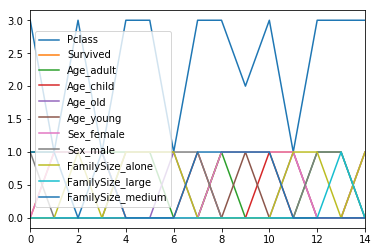

In [32]:
import matplotlib.pyplot as plt

data.head(15).plot()
plt.show()

Train shape: (1309, 11)


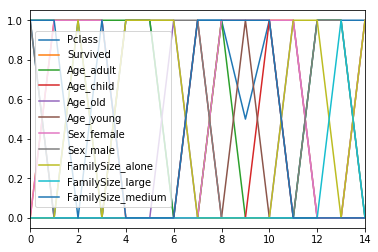

,count,mean,std,min,25%,50%,75%,max
Pclass,1309.0,0.647441,0.418918,0.0,0.5,1.0,1.0,1.0
Survived,891.0,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Age_adult,1309.0,0.723453,0.447461,0.0,0.0,1.0,1.0,1.0
Age_child,1309.0,0.038961,0.193576,0.0,0.0,0.0,0.0,1.0
Age_old,1309.0,0.084034,0.277544,0.0,0.0,0.0,0.0,1.0
Age_young,1309.0,0.153552,0.360657,0.0,0.0,0.0,0.0,1.0
Sex_female,1309.0,0.355997,0.478997,0.0,0.0,0.0,1.0,1.0
Sex_male,1309.0,0.644003,0.478997,0.0,0.0,1.0,1.0,1.0
FamilySize_alone,1309.0,0.603514,0.489354,0.0,0.0,1.0,1.0,1.0
FamilySize_large,1309.0,0.045837,0.209210,0.0,0.0,0.0,0.0,1.0


In [34]:
#Squeeze the data to [0,1]
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
data[['Pclass']] = scaler.fit_transform(data[['Pclass']])
print("Train shape: {}".format(data.shape))

data.head(15).plot()
plt.show()
data.describe().T

### Splitting the data to train and test

#### StratifiedKFold training set

In [89]:
from sklearn.model_selection import StratifiedKFold

y = np.array(data['Survived'])
X = np.array(data.drop('Survived', axis=1))

#split by idx
idx = train_samples
X_train, X_test = X[:idx], X[idx:]
y_train, y_test = y[:idx], y[idx:]

print("Shape train: {}".format(X_train.shape))
print("Shape test: {}".format(X_test.shape))
#print(y_train[0:1])
#print(X_train[0:1].tolist())

kf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
print(kf)

Shape train: (891, 10)
Shape test: (418, 10)
StratifiedKFold(n_splits=3, random_state=42, shuffle=True)


#### Voting Ensemble

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score


clf1 = LogisticRegression(random_state=42, warm_start=True)
clf2 = RandomForestClassifier(random_state=42, warm_start=True)
clf3 = GaussianNB()

#eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
                        #voting='soft')
eclf = VotingClassifier(estimators=[('rf', clf2)],
                        voting='soft')

estimators = 10
epoch = 1
for train_idx, val_idx in kf.split(X_train, y_train):
    X_t, X_v = X_train[train_idx], X_train[val_idx]
    y_t, y_v = y_train[train_idx], y_train[val_idx]
    
    clf2.set_params(n_estimators=estimators*epoch)
    epoch += 1
    # predict class probabilities for all classifiers
    #probas = [c.fit(X_train, y_train.reshape(-1)).predict_proba(X_test) for c in (clf1, clf2, clf3, eclf)]
    probas = [c.fit(X_train, y_train.reshape(-1)).predict_proba(X_test) for c in (clf2, eclf)]
    
    scores = cross_val_score(eclf, X_v, y_v.reshape(-1))
    print("{}".format(scores))

sample = 13
class_surv = [pr[sample, 0] for pr in probas]
class_not_surv = [pr[sample, 1] for pr in probas]
print("Probabilities survived (1): {}".format(class_surv))
print("Probabilities not survived (0): {}".format(class_not_surv))

[ 0.76767677  0.78787879  0.83838384]
[ 0.81818182  0.88888889  0.81818182]
[ 0.71717172  0.75757576  0.82828283]
Probabilities survived (1): [0.95773809523809528, 0.95773809523809528]
Probabilities not survived (0): [0.042261904761904757, 0.042261904761904757]


### Metrics (scikit-learn)

[[162   8]
 [ 33  65]]


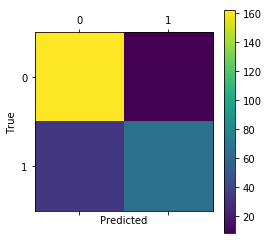

In [110]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

Xs_train, Xs_val, ys_train, ys_val = train_test_split(X_train, y_train, test_size=0.3)
ys_val = np.reshape(ys_val, [-1,1])

predictions = eclf.predict(Xs_val)
cm = confusion_matrix(ys_val, predictions)
print(cm)
plt.matshow(cm)
plt.colorbar()
ax = plt.gca()
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

plt.show()

In [111]:
print(classification_report(ys_val, predictions))

             precision    recall  f1-score   support

        0.0       0.83      0.95      0.89       170
        1.0       0.89      0.66      0.76        98

avg / total       0.85      0.85      0.84       268



## Get Predictions

In [112]:
predictions = eclf.predict(X_test)

passengerId = 892
print("PassengerId,Survived")
for i in range(len(X_test)):
    print("{},{}".format(passengerId, (int)(predictions[i])))
    passengerId += 1

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,0
899,0
900,1
901,0
902,0
903,0
904,1
905,0
906,1
907,1
908,0
909,0
910,0
911,0
912,0
913,0
914,1
915,0
916,1
917,0
918,1
919,0
920,0
921,0
922,0
923,0
924,0
925,0
926,0
927,0
928,0
929,0
930,0
931,0
932,0
933,0
934,0
935,1
936,1
937,0
938,0
939,0
940,1
941,0
942,0
943,0
944,1
945,1
946,0
947,0
948,0
949,0
950,0
951,1
952,0
953,0
954,0
955,0
956,0
957,1
958,1
959,0
960,0
961,1
962,0
963,0
964,0
965,0
966,1
967,0
968,0
969,1
970,0
971,0
972,0
973,0
974,0
975,0
976,0
977,0
978,0
979,1
980,0
981,1
982,0
983,0
984,1
985,0
986,0
987,0
988,1
989,0
990,0
991,0
992,1
993,0
994,0
995,0
996,1
997,0
998,0
999,0
1000,0
1001,0
1002,0
1003,0
1004,1
1005,1
1006,1
1007,0
1008,0
1009,1
1010,0
1011,1
1012,1
1013,0
1014,1
1015,0
1016,0
1017,1
1018,0
1019,0
1020,0
1021,0
1022,0
1023,0
1024,0
1025,0
1026,0
1027,0
1028,0
1029,0
1030,0
1031,0
1032,0
1033,1
1034,0
1035,0
1036,0
1037,0
1038,0
1039,0
1040,0
1041,0
1042,1
1043,0
1044,0
1045,0
1046,0
10